# Imports

In [1]:
from scipy.io import arff
import pandas as pd
import numpy as np
import operator
import math
import seaborn as sns
import matplotlib.pyplot as plt

# Loading data from .arff format

In [2]:
# Training data
data=arff.loadarff("trainProdSelection.arff")
tr_data = pd.DataFrame(data[0])

In [3]:
# Testing data
data=arff.loadarff("testProdSelection.arff")
te_data = pd.DataFrame(data[0])

## Visualising the data using seaborn

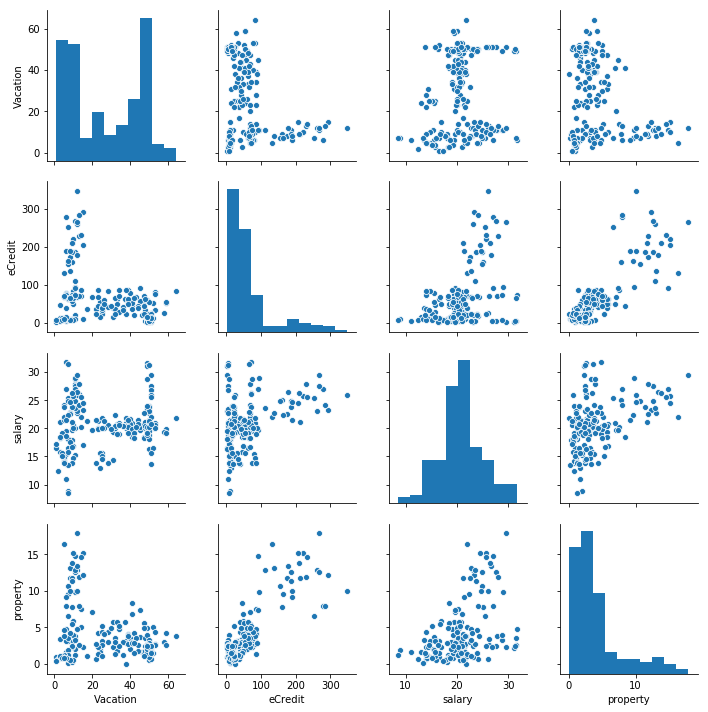

In [4]:
sns.pairplot(tr_data)

### Encoding string based series to UTF-8

In [5]:
# Training data
tr_data.LifeStyle=tr_data.LifeStyle.str.decode("UTF-8")
tr_data.Type=tr_data.Type.str.decode("UTF-8")
tr_data.label=tr_data.label.str.decode("UTF-8")

In [6]:
# Testing data
te_data.LifeStyle=te_data.LifeStyle.str.decode("UTF-8")
te_data.Type=te_data.Type.str.decode("UTF-8")
te_data.label=te_data.label.str.decode("UTF-8")

### One hot Encoding for categorical columns

In [7]:
tr_data_dummy = pd.get_dummies(tr_data[['Type','LifeStyle']],drop_first=True)
tr_data_dummy.head(10)

,Type_engineer,Type_librarian,Type_professor,Type_student,LifeStyle_spend<saving,LifeStyle_spend>>saving,LifeStyle_spend>saving
0,0,0,0,1,0,0,1
1,0,0,0,1,0,0,1
2,0,0,0,1,0,0,1
3,0,0,0,1,0,0,1
4,0,0,0,1,0,0,1
5,0,0,0,1,0,0,1
6,0,0,0,1,1,0,0
7,0,0,0,1,1,0,0
8,0,0,0,1,1,0,0
9,0,0,0,1,0,1,0


In [8]:
train_Final = pd.concat([tr_data,tr_data_dummy],axis=1)
train_Final = train_Final.drop(['LifeStyle','Type'],axis=1)
train_Final.head(10)

,Vacation,eCredit,salary,property,label,Type_engineer,Type_librarian,Type_professor,Type_student,LifeStyle_spend<saving,LifeStyle_spend>>saving,LifeStyle_spend>saving
0,6.0,40.0,13.62,3.2804,C1,0,0,0,1,0,0,1
1,11.0,21.0,15.32,2.0232,C1,0,0,0,1,0,0,1
2,7.0,64.0,16.55,3.1202,C1,0,0,0,1,0,0,1
3,3.0,47.0,15.71,3.4022,C1,0,0,0,1,0,0,1
4,15.0,10.0,16.96,2.2825,C1,0,0,0,1,0,0,1
5,6.0,80.0,15.50,3.7338,C1,0,0,0,1,0,0,1
6,10.0,49.0,16.86,5.8639,C1,0,0,0,1,1,0,0
7,10.0,84.0,14.66,3.1870,C1,0,0,0,1,1,0,0
8,9.0,74.0,13.86,2.3823,C1,0,0,0,1,1,0,0
9,22.0,38.0,13.88,0.7394,C1,0,0,0,1,0,1,0


In [9]:
train_Final = train_Final[[c for c in train_Final if c not in ['label']] + ['label']]
train_Final.head(10)

,Vacation,eCredit,salary,property,Type_engineer,Type_librarian,Type_professor,Type_student,LifeStyle_spend<saving,LifeStyle_spend>>saving,LifeStyle_spend>saving,label
0,6.0,40.0,13.62,3.2804,0,0,0,1,0,0,1,C1
1,11.0,21.0,15.32,2.0232,0,0,0,1,0,0,1,C1
2,7.0,64.0,16.55,3.1202,0,0,0,1,0,0,1,C1
3,3.0,47.0,15.71,3.4022,0,0,0,1,0,0,1,C1
4,15.0,10.0,16.96,2.2825,0,0,0,1,0,0,1,C1
5,6.0,80.0,15.50,3.7338,0,0,0,1,0,0,1,C1
6,10.0,49.0,16.86,5.8639,0,0,0,1,1,0,0,C1
7,10.0,84.0,14.66,3.1870,0,0,0,1,1,0,0,C1
8,9.0,74.0,13.86,2.3823,0,0,0,1,1,0,0,C1
9,22.0,38.0,13.88,0.7394,0,0,0,1,0,1,0,C1


In [10]:
te_data_dummy = pd.get_dummies(te_data[['Type','LifeStyle']],drop_first=True)
te_data_dummy.head(10)

,Type_engineer,Type_librarian,Type_professor,Type_student,LifeStyle_spend<saving,LifeStyle_spend>>saving,LifeStyle_spend>saving
0,0,0,0,1,1,0,0
1,0,0,0,1,0,1,0
2,0,0,0,1,0,0,0
3,1,0,0,0,0,0,1
4,0,1,0,0,1,0,0
5,0,1,0,0,0,0,1
6,0,0,1,0,0,0,1
7,0,0,1,0,1,0,0
8,0,0,0,1,1,0,0
9,0,0,0,1,0,0,1


In [11]:
test_Final = pd.concat([te_data,te_data_dummy],axis=1)
test_Final = test_Final.drop(['Type','LifeStyle'],axis=1)
test_Final.head(10)

,Vacation,eCredit,salary,property,label,Type_engineer,Type_librarian,Type_professor,Type_student,LifeStyle_spend<saving,LifeStyle_spend>>saving,LifeStyle_spend>saving
0,12.0,19.0,14.7900,3.7697,C1,0,0,0,1,1,0,0
1,29.0,10.0,16.1900,2.4839,C1,0,0,0,1,0,1,0
2,28.0,60.0,15.4600,1.1885,C1,0,0,0,1,0,0,0
3,15.0,41.0,21.2600,1.4379,C1,1,0,0,0,0,0,1
4,2.0,9.0,19.7207,0.6913,C1,0,1,0,0,1,0,0
5,7.0,9.0,12.7098,1.4728,C1,0,1,0,0,0,0,1
6,5.0,10.0,20.8830,1.3131,C1,0,0,1,0,0,0,1
7,3.0,15.0,16.5711,0.4792,C1,0,0,1,0,1,0,0
8,9.0,71.0,25.7000,2.0947,C1,0,0,0,1,1,0,0
9,10.0,67.0,27.1100,3.8391,C1,0,0,0,1,0,0,1


In [12]:
test_Final = test_Final[[c for c in test_Final if c not in ['label']] + ['label']]
test_Final.head(10)

,Vacation,eCredit,salary,property,Type_engineer,Type_librarian,Type_professor,Type_student,LifeStyle_spend<saving,LifeStyle_spend>>saving,LifeStyle_spend>saving,label
0,12.0,19.0,14.7900,3.7697,0,0,0,1,1,0,0,C1
1,29.0,10.0,16.1900,2.4839,0,0,0,1,0,1,0,C1
2,28.0,60.0,15.4600,1.1885,0,0,0,1,0,0,0,C1
3,15.0,41.0,21.2600,1.4379,1,0,0,0,0,0,1,C1
4,2.0,9.0,19.7207,0.6913,0,1,0,0,1,0,0,C1
5,7.0,9.0,12.7098,1.4728,0,1,0,0,0,0,1,C1
6,5.0,10.0,20.8830,1.3131,0,0,1,0,0,0,1,C1
7,3.0,15.0,16.5711,0.4792,0,0,1,0,1,0,0,C1
8,9.0,71.0,25.7000,2.0947,0,0,0,1,1,0,0,C1
9,10.0,67.0,27.1100,3.8391,0,0,0,1,0,0,1,C1


### Normalizing the data

In [13]:
min_D={}
max_D={}
def Min_Max_finder(x,val):
    min_D[val]=min(x)
    max_D[val]=max(x)

In [14]:
cols = train_Final.iloc[:,0:4].columns

In [15]:
cols

Index(['Vacation', 'eCredit', 'salary', 'property'], dtype='object')

In [16]:
for val in cols:
    Min_Max_finder(train_Final[val],val)

In [17]:
max_D

{'Vacation': 64.0, 'eCredit': 347.0, 'salary': 31.75, 'property': 17.8737}

In [18]:
min_D

{'Vacation': 1.0, 'eCredit': 3.0, 'salary': 8.5076, 'property': 0.008}

In [19]:
for val in cols:
    train_Final[val]=(train_Final[val]-min_D[val])/(max_D[val]-min_D[val])
    test_Final[val]=(test_Final[val]-min_D[val])/(max_D[val]-min_D[val])

In [31]:
print(train_Final.describe())

         Vacation     eCredit      salary    property  Type_engineer  \
count  186.000000  186.000000  186.000000  186.000000     186.000000   
mean     0.421830    0.173434    0.523060    0.231393       0.263441   
std      0.295088    0.200447    0.183497    0.210796       0.441688   
min      0.000000    0.000000    0.000000    0.000000       0.000000   
25%      0.126984    0.034884    0.430937    0.092041       0.000000   
50%      0.388889    0.120640    0.511023    0.161796       0.000000   
75%      0.746032    0.199855    0.614390    0.270211       1.000000   
max      1.000000    1.000000    1.000000    1.000000       1.000000   

       Type_librarian  Type_professor  Type_student  LifeStyle_spend<saving  \
count      186.000000      186.000000    186.000000              186.000000   
mean         0.123656        0.209677      0.204301                0.220430   
std          0.330077        0.408177      0.404278                0.415656   
min          0.000000        0.0000

In [21]:
tr_data = train_Final
te_data = test_Final

### Calculating the K nearest Neighbours for  a test data point using all train data points using Distance between two datapoints 

In [22]:
def eDistance(row1, row2, length):
    distance = 0
    for x in range(0,length):
        distance += pow((row1[x] - row2[x]), 2)
    return math.sqrt(distance)
def getNeighbours(trainSet, testInstance, k):
    distances = []
    length = len(testInstance)-1
    for x in range(len(trainSet)):
        dist = eDistance(testInstance, trainSet[x], length)
        distances.append((trainSet[x], dist))
    distances.sort(key=operator.itemgetter(1))
    neighbours = []
    for x in range(k):
        neighbours.append(distances[x][0])
    return neighbours

### Picking the right label from the given neighbours

In [23]:
def labelpredict(neighbours):
    votes = {}
    for x in range(len(neighbours)):
        response = neighbours[x][-1]
        if response in votes:
            votes[response] += 1
        else:
            votes[response] = 1
    sortedVotes = sorted(votes.items(), key=operator.itemgetter(1),reverse=True)
    return sortedVotes[0][0]

### Function to determine accuracy

In [24]:
def Accuracy(testSet, predictedLabels):
    correct = 0
    for x in range(len(testSet)):
        if testSet[x][-1] == predictedLabels[x]:
            correct += 1
    return (correct/float(len(testSet))) * 100.0

In [25]:
def knn(k):
    predictedLabels=[]
    for x in range(len(te_data)):
        neighbours = getNeighbours(tr_data.values, te_data.values[x], k)
        result = labelpredict(neighbours)
        predictedLabels.append(result)
    accuracy = Accuracy(te_data.values, predictedLabels)
    print('k= ' +repr(k) + ' Accuracy: ' + repr(round(accuracy)))
    return accuracy

### Checking for optimum k value

In [26]:
l=[]
val=[]
for i in range(3,50,2):
    l.append(knn(i))
    val.append(i)

k= 3 Accuracy: 29
k= 5 Accuracy: 29
k= 7 Accuracy: 29
k= 9 Accuracy: 24
k= 11 Accuracy: 24
k= 13 Accuracy: 24
k= 15 Accuracy: 29
k= 17 Accuracy: 24
k= 19 Accuracy: 14
k= 21 Accuracy: 14
k= 23 Accuracy: 14
k= 25 Accuracy: 19
k= 27 Accuracy: 24
k= 29 Accuracy: 14
k= 31 Accuracy: 14
k= 33 Accuracy: 19
k= 35 Accuracy: 19
k= 37 Accuracy: 19
k= 39 Accuracy: 24
k= 41 Accuracy: 24
k= 43 Accuracy: 24
k= 45 Accuracy: 24
k= 47 Accuracy: 24
k= 49 Accuracy: 24


## Accuracy vs K

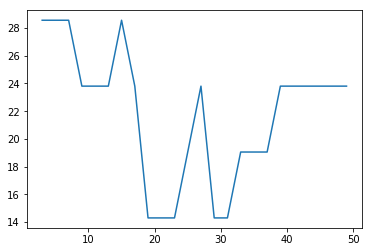

In [27]:
plt.plot(val,l)
plt.show()

In [28]:
maxK=l.index(max(l))
maxAccuracy=l[maxK]
print ("Highest Accuracy = "+str(maxAccuracy)+ " for k = "+str(maxK+3))

Highest Accuracy = 28.57142857142857 for k = 3


In [29]:
##############################################################################